<a href="https://colab.research.google.com/github/michelucci/aadl2-code/blob/master/chapter6/CNN_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example of a CNN with the CIFAR10 dataset

Created on 16/5/2019 14:16

(C) Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai

Umberto is author of the book "**Applied Deep Learning
A Case-Based Approach to Understanding Deep Neural Networks**" published by APRESS end of 2018. You can buy this book here

[toe.lt/book](http://toe.lt/book)


## Import of libraries

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import keras

from keras.optimizers import adam
from keras.callbacks import Callback

from keras.utils import np_utils # To transform labels in categorical
from keras.datasets import mnist # To load the dataset


import numpy as np
import matplotlib.pyplot as plt


from keras import backend as K
K.set_image_dim_ordering('tf') # To tell TensorFlow the right order of dims

# if using google colab and wants to upload or download files
from google.colab import files

In [0]:
# Just to set some standard plot format
import matplotlib as mpl
mpl.style.use('classic')

## Preparation of the data

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples


In [0]:
nClasses = 10
y_train = np_utils.to_categorical(y_train,nClasses)
y_test = np_utils.to_categorical(y_test,nClasses)

In [50]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


## Neural Network Model

### Creation of the model

In [0]:
num_classes = 10
def createModel():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
     
    return model

In [0]:
K.clear_session()
model = createModel()

In [0]:
AdamOpt = adam(lr=0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### ```CustomCallBack``` class for logging

In [0]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (epoch % 10 == 0):
          print ("Just finished epoch", epoch)
          print ("--------------------------------")
          print ('Loss evaluated on the validation dataset =',
                 logs.get('val_loss'))
          print ('Accuracy reached train is', 
                 logs.get('acc'))
          print ('Accuracy reached Val   is', 
                 logs.get('val_acc'))
          return

### Training of the network

In [69]:
batch_size = 256
epochs = 50

CC = CustomCallback()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    verbose=0, 
                    validation_data=(x_test, y_test),
          callbacks = [CC])

Just finished epoch 0
--------------------------------
Loss evaluated on the validation dataset = 0.07684606027454138
Accuracy reached train is 0.8881666666984558
Accuracy reached Val   is 0.9747
Just finished epoch 10
--------------------------------
Loss evaluated on the validation dataset = 0.02740396794825792
Accuracy reached train is 0.9880833333015442
Accuracy reached Val   is 0.9908
Just finished epoch 20
--------------------------------
Loss evaluated on the validation dataset = 0.02576148393364565
Accuracy reached train is 0.9911333333015442
Accuracy reached Val   is 0.9929
Just finished epoch 30
--------------------------------
Loss evaluated on the validation dataset = 0.02506331851132418
Accuracy reached train is 0.9929
Accuracy reached Val   is 0.9931
Just finished epoch 40
--------------------------------
Loss evaluated on the validation dataset = 0.025374221243094235
Accuracy reached train is 0.9934833333333334
Accuracy reached Val   is 0.9931


# Save the model and the weights

In [72]:
# serialize model to JSON
model_json = model.to_json()
with open("model_mnist.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_mnist.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from google.colab import files
files.download("model_mnist.json")
files.download("model_mnist.h5")

## Plots

Text(0, 0.5, 'Loss')

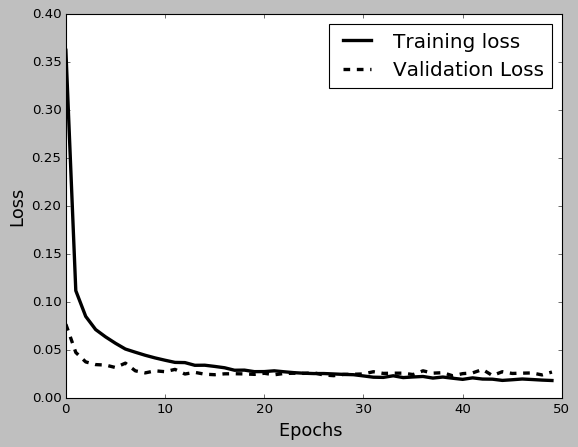

In [70]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)

#plt.savefig('loss.png', bbox_inches='tight', dpi = 300)
#files.download('loss.png')

Text(0, 0.5, 'Accuracy')

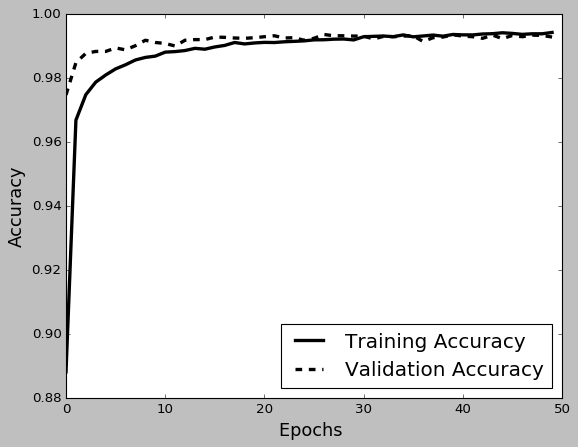

In [71]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'black',linewidth=3.0)
plt.plot(history.history['val_acc'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)

#plt.savefig('accuracy.png', bbox_inches='tight', dpi = 300)
#files.download('accuracy.png')